In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

In [295]:
folder_path = '/Users/Viktoryia/Documents/gb/computer_vision/archive/lfw-deepfunneled/lfw-deepfunneled'
csv_path = '/Users/Viktoryia/Documents/gb/computer_vision/archive/'

In [296]:
csv_dict = {}
for file in os.listdir(csv_path):
    if file.split('.')[-1] == 'csv':
        name = str(file.split('.')[0])
        csv_dict[name] = pd.read_csv('/Users/Viktoryia/Documents/gb/computer_vision/archive/' + file)
                

In [297]:
csv_dict.keys()

dict_keys(['pairs', 'matchpairsDevTest', 'people', 'lfw_readme', 'peopleDevTest', 'mismatchpairsDevTrain', 'matchpairsDevTrain', 'mismatchpairsDevTest', 'lfw_allnames', 'peopleDevTrain'])

In [298]:
lfw_allnames = csv_dict.get('lfw_allnames')
lfw_allnames.shape

(5749, 2)

In [299]:
lfw_allnames.name.value_counts()

AJ_Cook               1
Michelle_Hofland      1
Miguel_Jimenez        1
Miguel_Hakim          1
Miguel_Estrada        1
                     ..
Gina_Gershon          1
Gina_Centrello        1
Gillian_Anderson      1
Gilles_Panizzi        1
Zydrunas_Ilgauskas    1
Name: name, Length: 5749, dtype: int64

In [300]:
len(os.listdir(folder_path))

5750

In [321]:
# Достаем пути к файлам
pathes = []
for root, dir, files in os.walk(folder_path):
    for file in files:
        pathes.append(os.path.join(root, file))

pathes.pop(0)  


'/Users/Viktoryia/Documents/gb/computer_vision/archive/lfw-deepfunneled/lfw-deepfunneled/.DS_Store'

In [333]:
# вытаскиваем имена
names = []
for i in pathes:
    name = i.split('/')[-1].split('.')[0].split('_')[0] + ' ' + i.split('/')[-1].split('.')[0].split('_')[1]
    names.append(name)

In [341]:
# собираем датафрейм
df = pd.DataFrame({'name':names, 'path':pathes})
df.head()   

,name,path
0,German Khan,/Users/Viktoryia/Documents/gb/computer_vision/...
1,Stefano Gabbana,/Users/Viktoryia/Documents/gb/computer_vision/...
2,Dragan Covic,/Users/Viktoryia/Documents/gb/computer_vision/...
3,Jeff Hornacek,/Users/Viktoryia/Documents/gb/computer_vision/...
4,Sureyya Ayhan,/Users/Viktoryia/Documents/gb/computer_vision/...


In [342]:
df.name.value_counts()

George W             530
Colin Powell         236
Tony Blair           144
Donald Rumsfeld      121
Gerhard Schroeder    109
                    ... 
Jon Stewart            1
Jackie Sherrill        1
George Murphy          1
Bob Hayes              1
Michel Minard          1
Name: name, Length: 5745, dtype: int64

In [306]:
copy = image_paths.copy()

<AxesSubplot:>

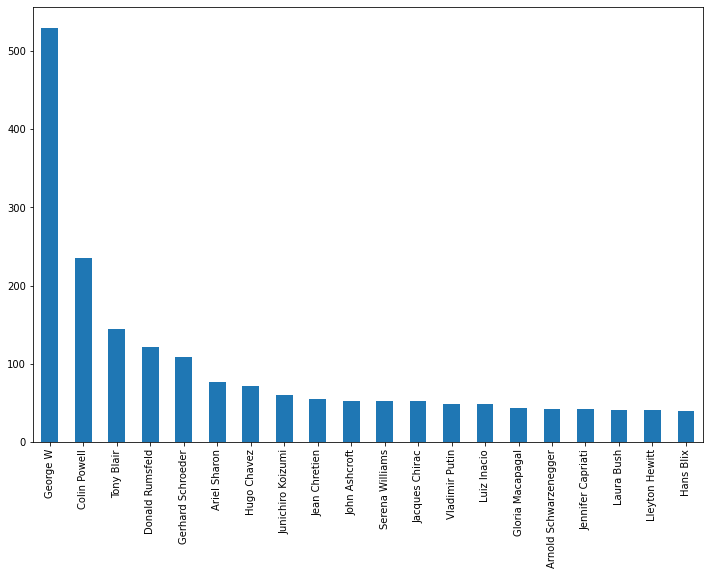

In [343]:
plt.figure(figsize=(12, 8))
df['name'].value_counts()[:20].plot(kind='bar')

In [344]:
# переводим в категории имена
df['number_name'] = LabelEncoder().fit_transform(df['name'])

In [345]:
df['number_name'].value_counts()

1876    530
1055    236
5453    144
1411    121
1897    109
       ... 
2806      1
2286      1
1866      1
610       1
3805      1
Name: number_name, Length: 5745, dtype: int64

In [357]:
df.head()

,name,path,number_name
0,German Khan,/Users/Viktoryia/Documents/gb/computer_vision/...,1898
1,Stefano Gabbana,/Users/Viktoryia/Documents/gb/computer_vision/...,5084
2,Dragan Covic,/Users/Viktoryia/Documents/gb/computer_vision/...,1441
3,Jeff Hornacek,/Users/Viktoryia/Documents/gb/computer_vision/...,2488
4,Sureyya Ayhan,/Users/Viktoryia/Documents/gb/computer_vision/...,5188


In [346]:
name_count = pd.DataFrame(df['number_name'].value_counts().reset_index().values,
                          df['name'].value_counts().reset_index().values, columns=['number_name', 'num_samples'])
name_count.head(10)

,number_name,num_samples
"(George W, 530)",1876,530
"(Colin Powell, 236)",1055,236
"(Tony Blair, 144)",5453,144
"(Donald Rumsfeld, 121)",1411,121
"(Gerhard Schroeder, 109)",1897,109
"(Ariel Sharon, 77)",376,77
"(Hugo Chavez, 71)",2179,71
"(Junichiro Koizumi, 60)",2938,60
"(Jean Chretien, 55)",2458,55
"(John Ashcroft, 53)",2686,53


In [364]:
samples = pd.DataFrame(df['name'].value_counts().reset_index())
samples.columns = ['name', 'count']
samples.head()

,name,count
0,George W,530
1,Colin Powell,236
2,Tony Blair,144
3,Donald Rumsfeld,121
4,Gerhard Schroeder,109


In [367]:
# добавляем количество фото для фильтрации
df = df.merge(samples, on='name')

In [441]:
final_df = df.loc[df['count'] > 50]
final_df.head()

,name,path,number_name,count
2560,Jacques Chirac,/Users/Viktoryia/Documents/gb/computer_vision/...,2293,52
2561,Jacques Chirac,/Users/Viktoryia/Documents/gb/computer_vision/...,2293,52
2562,Jacques Chirac,/Users/Viktoryia/Documents/gb/computer_vision/...,2293,52
2563,Jacques Chirac,/Users/Viktoryia/Documents/gb/computer_vision/...,2293,52
2564,Jacques Chirac,/Users/Viktoryia/Documents/gb/computer_vision/...,2293,52


In [425]:
less_df = df.loc[df['count'] == 48]
less_df.head()

,name,path,number_name,count
4816,Luiz Inacio,/Users/Viktoryia/Documents/gb/computer_vision/...,3394,48
4817,Luiz Inacio,/Users/Viktoryia/Documents/gb/computer_vision/...,3394,48
4818,Luiz Inacio,/Users/Viktoryia/Documents/gb/computer_vision/...,3394,48
4819,Luiz Inacio,/Users/Viktoryia/Documents/gb/computer_vision/...,3394,48
4820,Luiz Inacio,/Users/Viktoryia/Documents/gb/computer_vision/...,3394,48


In [426]:
#  для теста на незнакомых данных
Lui_eval = []
for i in less_df.path:
    Lui_eval.append(image_preprocessing(i))
Lui_eval = tf.convert_to_tensor(Lui_eval)    

In [369]:
final_df.shape

(1560, 4)

In [371]:
y = df.number_name
X = df.path
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

4293


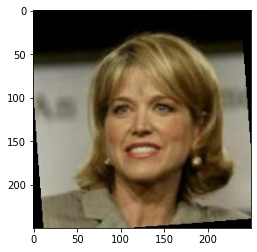

In [372]:
# проверяем соответствие
test = list(zip(X_test, y_test))
for X,y in test:
    plt.imshow(image_preprocessing(X))
    print(y)
    break

In [373]:
df.loc[df['number_name'] ==4293]

,name,path,number_name,count
12148,Paula Zahn,/Users/Viktoryia/Documents/gb/computer_vision/...,4293,2
12149,Paula Zahn,/Users/Viktoryia/Documents/gb/computer_vision/...,4293,2


In [384]:
# для теста на занкомых данных
George_W_Bush = []
Hugo_Chavez = []
Tony_Blair = []
for (X, y) in test:
    if y == 1871:
        George_W_Bush.append(image_preprocessing(X))
    if y == 2175:
         Hugo_Chavez.append(image_preprocessing(X))
    if y == 5458:
         Tony_Blair.append(image_preprocessing(X))        

In [389]:
George = tf.convert_to_tensor(George_W_Bush)
Hugo = tf.convert_to_tensor(Hugo_Chavez)
Tony = tf.convert_to_tensor(Tony_Blair)
len(George_W_Bush), len(Hugo), len(Tony)

(8, 2, 0)

In [391]:
George[0].shape

TensorShape([250, 250, 3])

In [377]:
def image_preprocessing(link):
    img = tf.io.read_file(link)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.cast(img, dtype=tf.float32) / 255
    return img      

In [378]:
X_ftrain = []
for i in X_train:
    X_ftrain.append(image_preprocessing(i))       

In [379]:
X_ftrain = tf.convert_to_tensor(X_ftrain)

In [380]:
MARGIN = 10.0

def contastive_loss(embs, labels):
    bs = embs.shape[0]
    embs1 = embs[:bs//2, :]
    embs2 = embs[bs//2:, :]
    labels1 = labels[:bs//2]
    labels2 = labels[bs//2:]

    d2 = tf.reduce_sum(tf.square(embs1 - embs2), axis=1)
    d =  tf.sqrt(d2)
    z = tf.cast(labels1 == labels2, tf.float32)
    
    return tf.reduce_mean(z * d2 + (1-z) * tf.maximum(0, MARGIN - d)**2)

In [381]:
EMB_SIZE = 64

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(EMB_SIZE, activation=None),
])

In [395]:
BATCH_SIZE = 64
NUM_EPOCHS = 3

train_ds = tf.data.Dataset.from_tensor_slices((X_ftrain, y_train))
train_ds = train_ds.shuffle(buffer_size=X_ftrain.shape[0])
#train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(BATCH_SIZE)

test_ds = tf.data.Dataset.from_tensor_slices((X_ftest, y_test))
test_ds = test_ds.batch(BATCH_SIZE)

In [396]:
LEARNING_RATE = 0.001
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

In [397]:
%%time

for iteration, (images, labels) in enumerate(train_ds):
    
    # Forward
    with tf.GradientTape() as tape:
        embs = model(images)
        loss_value = contastive_loss(embs, labels)
        
    # Backward
    grads = tape.gradient(loss_value, model.variables)
    optimizer.apply_gradients(zip(grads, model.variables))

    if iteration % 200 == 0:
        print('[{}] Loss: {}'.format(iteration, loss_value.numpy()))

2022-09-25 18:49:52.253017: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1990 of 9924
2022-09-25 18:50:01.744044: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2755 of 9924
2022-09-25 18:50:11.740253: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3722 of 9924
2022-09-25 18:50:21.775351: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4608 of 9924
2022-09-25 18:50:31.752907: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 5287 of 9924
2022-09-25 18:50:41.739632: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6034 of 9924
2022-09-25 18:50:51.741425: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shu

[0] Loss: 90.28113555908203
CPU times: user 1h 7s, sys: 11min 56s, total: 1h 12min 3s
Wall time: 32min 7s


In [398]:
model.save('./')

INFO:tensorflow:Assets written to: ./assets


INFO:tensorflow:Assets written to: ./assets


In [399]:
new_model = tf.keras.models.load_model('/Users/Viktoryia/Documents/gb/computer_vision')

In [400]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 250, 250, 32)      2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 125, 125, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 246016)            0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [404]:
G_prediction = new_model.predict(George)
H_prediction = new_model.predict(Hugo)

1/1 [==============================] - 0s 95ms/step


In [405]:
len(G_prediction), len(H_prediction)

(8, 2)

In [440]:
#недообучение страшное, но ресурсы малы(
def diff(e1, e2):
    return np.sum((e1 - e2)**2) ** 0.5
# знакомые данные
G_1  = G_prediction[4]
G_2  = G_prediction[5]
H_1  = H_prediction[1]

print('G_1 <-> G_2: ', diff(G_1, G_2))
print('G_2 <-> H_1: ', diff(G_2, H_1))
print('G_1 <-> H1: ', diff(G_1, H_1))

G_1 <-> G_2:  13.821411020148798
G_2 <-> H_1:  31.587998286409153
G_1 <-> H1:  34.9545236784302


In [427]:
# Незнакомые данные
L_prediction = new_model.predict(Lui_eval)

2/2 [==============================] - 2s 510ms/step


In [438]:
G_1  = G_prediction[4]
G_2  = G_prediction[5]
L_1  = L_prediction[3]

print('G_1 <-> G_2: ', diff(G_1, G_2))
print('G_2 <-> L_1: ', diff(G_2, L_1))
print('G_1 <-> L1: ', diff(G_1, L_1))

G_1 <-> G_2:  13.821411020148798
G_2 <-> L_1:  34.44988292569004
G_1 <-> L1:  42.35178227553195
